In [ ]:
##@Author: Gemma Gordon
#@Date: 2022
# Script to parse PyIgClassify2 database for canonical forms for our structural datasets (https://www.biorxiv.org/content/10.1101/2022.10.12.511988v1)

parsing pyigclassify2 data for cluster canonical forms for structures used in our analysis

In [1]:
import pandas as pd

In [2]:
domain_data = pd.read_csv("pyigclassify2_data/pyig_domain_data.txt", sep='\s+', header=0)

/Users/gemmagordon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (35,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
h_domains = [d for d in list(domain_data['var']) if d == 'H']

In [4]:
h_data = domain_data.loc[domain_data['var'].isin(h_domains)][['pdb', 'cdr1_cluster', 'cdr2_cluster', 'cdr3_cluster', 'cdr4_cluster']]

In [5]:
h_data

,pdb,cdr1_cluster,cdr2_cluster,cdr3_cluster,cdr4_cluster
0,12E8,H1-13-1,H2-10-1,H3-13-*,H4-8-1
3,12E8,H1-13-1,H2-10-1,H3-13-*,H4-8-1
4,15C8,H1-13-1,H2-10-1,H3-12-*,H4-8-1
6,1A0Q,H1-13-1,H2-10-3,H3-12-*,H4-8-1
8,1A14,H1-13-1,H2-10-1,H3-15-*,H4-8-1
...,...,...,...,...,...
22972,8DJK,H1-13-1,H2-10-1,H3-13-*,H4-8-1
22974,8DJM,H1-13-1,H2-10-1,H3-13-*,H4-8-1
22976,8DT3,H1-13-1,H2-10-1,H3-14-*,H4-8-1
22979,8FAB,H1-13-1,H2-10-2,H3-14-*,H4-8-1


get list of our Abs and Nbs datasets PDB ids

In [6]:
abs_pdbs = [pdb.upper() for pdb in list(pd.read_csv('Dataset_flAbs_summary.csv')['pdb'])]

In [7]:
nbs_pdbs = [pdb.upper() for pdb in list(pd.read_csv('Dataset_sdAbs_summary.csv')['pdb'])]

extract dunbrack clusters from pyigclassify set for our PDB structures

In [8]:
abs_clusters = h_data.loc[h_data['pdb'].isin(abs_pdbs)].reset_index().drop(columns=['index'])

In [9]:
abs_clusters

,pdb,cdr1_cluster,cdr2_cluster,cdr3_cluster,cdr4_cluster
0,1AHW,H1-13-1,H2-10-*,H3-10-*,H4-8-1
1,1AHW,H1-13-1,H2-10-1,H3-10-*,H4-8-1
2,1AR1,H1-13-1,H2-10-2,H3-11-*,H4-8-1
3,1BGX,H1-14-*,H2-9-*,H3-12-*,H4-8-1
4,1BJ1,H1-13-1,H2-10-1,H3-16-*,H4-8-1
...,...,...,...,...,...
1451,7TN0,H1-13-1,H2-10-1,H3-20-*,H4-8-1
1452,7TN0,H1-13-1,H2-10-1,H3-20-*,H4-8-1
1453,7TN0,H1-13-1,H2-9-1,H3-14-*,H4-8-1
1454,7TN0,H1-13-1,H2-9-1,H3-14-*,H4-8-1


In [10]:
nbs_clusters = h_data.loc[h_data['pdb'].isin(nbs_pdbs)].reset_index().drop(columns=['index'])

In [11]:
nbs_clusters

,pdb,cdr1_cluster,cdr2_cluster,cdr3_cluster,cdr4_cluster
0,1KXQ,H1-10-*,H2-10-1,H3-16-*,H4-8-*
1,1KXQ,H1-10-*,H2-10-1,H3-16-*,H4-8-*
2,1KXQ,H1-10-*,H2-10-1,H3-16-*,H4-8-*
3,1KXQ,H1-10-*,H2-10-1,H3-16-*,H4-8-*
4,1KXT,H1-13-*,H2-9-1,H3-21-*,H4-8-*
...,...,...,...,...,...
616,7T5F,H1-13-1,H2-10-2,H3-11-*,H4-8-1
617,7T5F,H1-13-*,H2-9-1,H3-11-*,H4-8-1
618,7T5F,H1-13-1,H2-10-2,H3-11-*,H4-8-1
619,7T5F,H1-13-*,H2-9-1,H3-11-*,H4-8-1


check that all our structures are present in dunbrack data/identify any missing

In [12]:
for a in abs_pdbs: 
    if a not in list(abs_clusters['pdb']):
        print(a)

3RVW
6ERX
5USI
3L5Y


In [13]:
for n in nbs_pdbs: 
    if n not in list(nbs_clusters['pdb']):
        print(n)

6CSY
6F5G


In [14]:
missing = ['3RVW', '6ERX', '5USI', '3L5Y', '6CSY', '6F5G']

for m in missing:
    if m in domain_data['pdb']:
        print('TRUE')
    else:
        print('FALSE')

FALSE
FALSE
FALSE
FALSE
FALSE
FALSE


add in missing clusters

just need PDB ID, cluster for cdrh1,2,3 (none for 4)

In [15]:
import os, glob
import pandas as pd

In [72]:
output_dict = dict()

for filename in glob.iglob('pyigclassify2/**', recursive=True):
    if os.path.isfile(filename): 
        if 'Clusters.txt' in filename:
            # get cluster lines from txt file
            with open(filename) as file:
                lines = file.readlines()[4:]
                for line in lines:
                    info = line.split(' ')
                    pdb_id = info[1]
                    all_chains = info[3].split('\t')
                    if all_chains[0] == 'H1':
                        cdrh1 = all_chains[6]
                    elif all_chains[0] == 'H2':
                        cdrh2 = all_chains[6]
                    elif all_chains[0] == 'H3':
                        cdrh3 = all_chains[6]  
                    clusters = cdrh1, cdrh2, cdrh3
                    output_dict[pdb_id] = clusters

print(output_dict)

{'6F5G': ('H1-13-5', 'H2-10-2', 'NA'), '3RVW': ('H1-14-1', 'H2-9-1', 'NA'), '6CSY': ('H1-13-1', 'H2-9-1', 'H3-10-2'), '5USI': ('H1-13-1', 'H2-10-1', 'H3-10-1'), '6ERX': ('H1-13-1', 'H2-10-1', 'NA'), '3L5Y': ('H1-15-1', 'H2-9-1', 'H3-13-2')}


In [86]:
missing_results = pd.DataFrame.from_dict(output_dict).transpose()
missing_results = missing_results.reset_index(level=0)
missing_results.set_axis(['pdb', 'cdr1_cluster', 'cdr2_cluster', 'cdr3_cluster'], axis=1, inplace=True)
missing_results['cdr4_cluster'] = 'NA'
missing_results['Ig_ID'] = ['Nbs', 'Abs', 'Nbs', 'Abs', 'Abs', 'Abs']

In [87]:
missing_results

,pdb,cdr1_cluster,cdr2_cluster,cdr3_cluster,cdr4_cluster,Ig_ID
0,6F5G,H1-13-5,H2-10-2,NA,NA,Nbs
1,3RVW,H1-14-1,H2-9-1,NA,NA,Abs
2,6CSY,H1-13-1,H2-9-1,H3-10-2,NA,Nbs
3,5USI,H1-13-1,H2-10-1,H3-10-1,NA,Abs
4,6ERX,H1-13-1,H2-10-1,NA,NA,Abs
5,3L5Y,H1-15-1,H2-9-1,H3-13-2,NA,Abs


plot frequency of dunbrack forms:

concat abs and nbs results and add labels for whether abs or nbs

filter results so just have one result per structure (most similar/same but some eg * or no *) ??

In [88]:
for row in abs_clusters.iterrows(): 
    abs_clusters['Ig_ID'] = 'Abs'
for row in nbs_clusters.iterrows():
    nbs_clusters['Ig_ID'] = 'Nbs'

abs_and_nbs = pd.concat([abs_clusters, nbs_clusters], axis=0)
abs_and_nbs = abs_and_nbs.drop_duplicates(subset='pdb', keep='first')
abs_and_nbs = pd.concat([abs_and_nbs, missing_results], axis=0)

In [99]:
abs_clusters = abs_and_nbs.loc[abs_and_nbs['Ig_ID'] == 'Abs'].drop_duplicates(subset='pdb', keep='first')
nbs_clusters = abs_and_nbs.loc[abs_and_nbs['Ig_ID'] == 'Nbs'].drop_duplicates(subset='pdb', keep='first')

In [100]:
def plot_form_freq(abs_series, nbs_series, title):

    # create df of counts
    df = pd.DataFrame([abs_series.value_counts(), nbs_series.value_counts()]).transpose().fillna(0)
    df = df.reset_index(level=0)
    df = df.set_axis(['Form', 'Abs', 'sdAbs'], axis=1)

    # get proportions of canonical forms so frequency normalised 
    df['Abs_proportions'] = (df['Abs'] / df['Abs'].sum()) * 100
    df['sdAbs_proportions'] = (df['sdAbs'] / df['sdAbs'].sum()) * 100    
    
    # plot
    plt.figure()
    df.plot.bar(x='Form', y=['Abs_proportions', 'sdAbs_proportions'], color={'Abs_proportions':'lightcoral', 'sdAbs_proportions':'royalblue'})
    plt.xlabel('Canonical form')
    plt.ylabel('Normalised frequency')
    plt.legend(['Abs', 'sdAbs'])
    plt.title(title)
    plt.show()

    return 


In [101]:
df = pd.DataFrame([abs_clusters['cdr1_cluster'].value_counts(), nbs_clusters['cdr1_cluster'].value_counts()]).transpose().fillna(0)
df = df.reset_index(level=0)
df = df.set_axis(['Form', 'Abs', 'sdAbs'], axis=1)

In [102]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

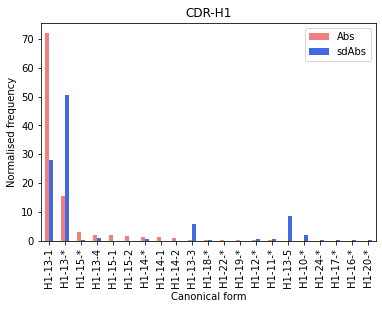

In [103]:
plot_form_freq(abs_clusters['cdr1_cluster'], nbs_clusters['cdr1_cluster'], 'CDR-H1')

<Figure size 432x288 with 0 Axes>

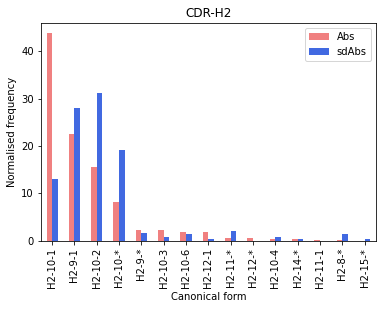

In [104]:
plot_form_freq(abs_clusters['cdr2_cluster'], nbs_clusters['cdr2_cluster'], 'CDR-H2')

<Figure size 432x288 with 0 Axes>

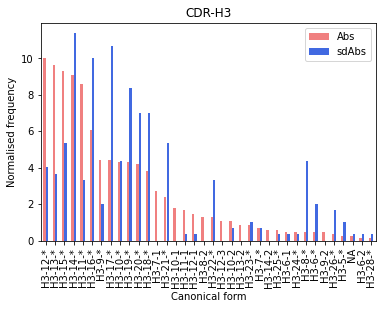

In [105]:
plot_form_freq(abs_clusters['cdr3_cluster'], nbs_clusters['cdr3_cluster'], 'CDR-H3')

In [106]:
abs_and_nbs.to_csv('dunbrack_clustering_results.csv')

In [1]:
import pandas as pd

In [2]:
results = pd.read_csv('dunbrack_clustering_results.csv')

In [4]:
results.columns

Index(['Unnamed: 0', 'pdb', 'cdr1_cluster', 'cdr2_cluster', 'cdr3_cluster',
       'cdr4_cluster', 'Ig_ID'],
      dtype='object')

### % CDR1 unassigned

In [8]:
unassigned = []
for result in results['cdr1_cluster']:
    if '*' in str(result):
        unassigned.append(result)

print(len(results['cdr1_cluster']))
print(len(unassigned))
print((len(unassigned) / len(results['cdr1_cluster'])) * 100)

1137
339
29.815303430079155


### % CDR2 unassigned

In [9]:
unassigned = []
for result in results['cdr2_cluster']:
    if '*' in str(result):
        unassigned.append(result)

print(len(results['cdr2_cluster']))
print(len(unassigned))
print((len(unassigned) / len(results['cdr2_cluster'])) * 100)

1137
173
15.215479331574318


### % CDR3 unassigned

In [10]:
unassigned = []
for result in results['cdr3_cluster']:
    if '*' in str(result):
        unassigned.append(result)

print(len(results['cdr3_cluster']))
print(len(unassigned))
print((len(unassigned) / len(results['cdr3_cluster'])) * 100)

1137
1014
89.18205804749341
